In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.linear_model import LogisticRegression 
from sklearn import svm 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [121]:
DF = pd.read_csv('healthcare-dataset-stroke-data.csv')
DF.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [122]:
DF.shape

(5110, 12)

In [123]:
DF.columns


Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


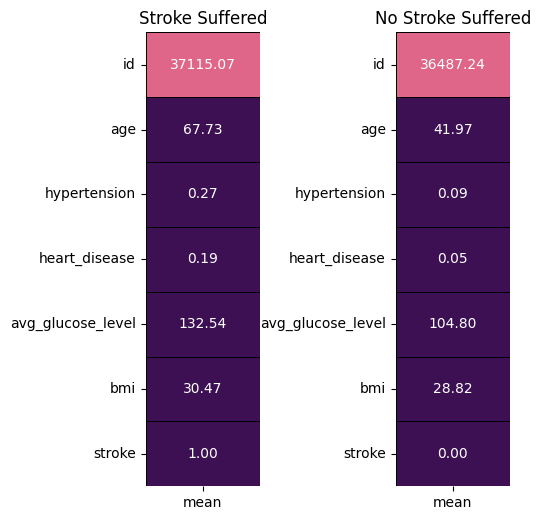

In [126]:
stroke = DF[DF['stroke'] == 1].describe().T
no_stroke = DF[DF['stroke'] == 0].describe().T

colors = ['#3C1053','#DF6589']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(stroke[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Stroke Suffered')

plt.subplot(1,2,2)
sns.heatmap(no_stroke[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Stroke Suffered')

fig.tight_layout(pad = 0)


* Mean values of all the features for cases of stroke suffered and no stroke suffered.

* age and avg_glucose_level can be solid 1st hand indicators to identify a stroke.
* Mean age values of patients that suffered a stroke, 67.73,is much higher than those did not suffer a stroke, 41.97.
* Similarly, avg_glucose_level value of 132.54 can indicate a higher chance of suffering from stroke than the avg_glucose_level value of 104.80 that has been found in patients that did not suffer a stroke

In [71]:
DF.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [72]:
DF['bmi'].fillna(DF['bmi'].mean(), inplace=True)


In [73]:
DF.drop(columns = ['id'],inplace = True)
col = list(DF.columns)
categorical_features = []
discrete_features = []
for i in col:
    if len(DF[i].unique()) > 6:
        discrete_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Discrete Features :',*discrete_features)

DF['age'] = DF['age'].astype(int)
df1 = DF.copy(deep = True)

Categorical Features : gender hypertension heart_disease ever_married work_type Residence_type smoking_status stroke
Discrete Features : age avg_glucose_level bmi


* We drop the id column as it is just a unique identifier.

* Here, categorical features are defined if the the attribute has less than 6 unique elements else it is a discrete feature.

In [74]:
from sklearn.preprocessing import LabelEncoder

text_data_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

encoders = {}

print("Label Encoder Transformation:")
for col in text_data_features:
    le = LabelEncoder()
    df1[col] = le.fit_transform(df1[col])
    encoders[col] = le  # store to inverse if needed later
    print(f"{col} : {dict(zip(le.classes_, le.transform(le.classes_)))}")


Label Encoder Transformation:
gender : {'Female': np.int64(0), 'Male': np.int64(1), 'Other': np.int64(2)}
ever_married : {'No': np.int64(0), 'Yes': np.int64(1)}
work_type : {'Govt_job': np.int64(0), 'Never_worked': np.int64(1), 'Private': np.int64(2), 'Self-employed': np.int64(3), 'children': np.int64(4)}
Residence_type : {'Rural': np.int64(0), 'Urban': np.int64(1)}
smoking_status : {'Unknown': np.int64(0), 'formerly smoked': np.int64(1), 'never smoked': np.int64(2), 'smokes': np.int64(3)}


* gender  :  [1 0 2]  =  ['Male' 'Female' 'Other']
* ever_married  :  [1 0]  =  ['Yes' 'No']
* work_type  :  [2 3 0 4 1]  =  ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
* Residence_type  :  [1 0]  =  ['Urban' 'Rural']
* smoking_status  :  [1 2 3 0]  =  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']

In [75]:
tf1 = {}

# From encoders
for col, le in encoders.items():
    tf1[col] = dict(zip(le.transform(le.classes_), le.classes_))

tf1['hypertension'] = {0: 'No Hypertension', 1: 'Hypertension'}
tf1['heart_disease'] = {0: 'No Heart Disease', 1: 'Heart Disease'}

tf1


{'gender': {np.int64(0): 'Female', np.int64(1): 'Male', np.int64(2): 'Other'},
 'ever_married': {np.int64(0): 'No', np.int64(1): 'Yes'},
 'work_type': {np.int64(0): 'Govt_job',
  np.int64(1): 'Never_worked',
  np.int64(2): 'Private',
  np.int64(3): 'Self-employed',
  np.int64(4): 'children'},
 'Residence_type': {np.int64(0): 'Rural', np.int64(1): 'Urban'},
 'smoking_status': {np.int64(0): 'Unknown',
  np.int64(1): 'formerly smoked',
  np.int64(2): 'never smoked',
  np.int64(3): 'smokes'},
 'hypertension': {0: 'No Hypertension', 1: 'Hypertension'},
 'heart_disease': {0: 'No Heart Disease', 1: 'Heart Disease'}}

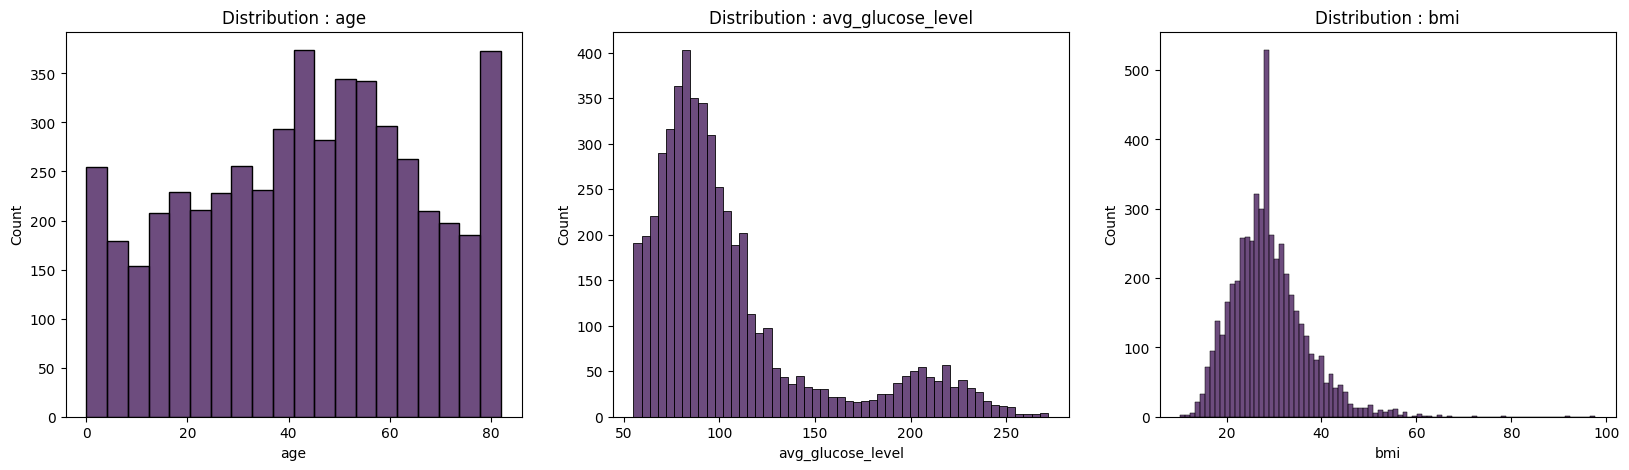

In [125]:
fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (20,5))
for i in range(len(discrete_features)):
    plt.subplot(1,3,i+1)
    sns.histplot(df1[discrete_features[i]],color = colors[0])
    title = 'Distribution : ' + discrete_features[i]
    plt.title(title)
plt.show()

* Data distribution for age has dominant values around : 10, 60 & 80.
* avg_glucose_level has 2 peaks of uneven heights present at values around : 100 & 200.
* bmi has a near about normal distribution but it has values in low numbers towards the right side!

<Axes: xlabel='stroke', ylabel='count'>

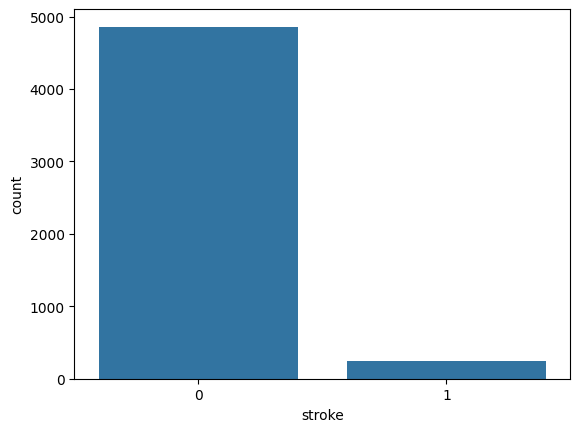

In [77]:
sns.countplot(DF,x='stroke')

The dataset is Unbalanced with a bias towards No Stroke.

In [78]:
X = df1.drop(['stroke'], axis = 1)
y = df1['stroke']

X_train, X_test, y_train , y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)
X_train.shape, X_test.shape


((3423, 10), (1687, 10))

In [79]:
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=0,max_depth= 5)
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)

print(confusion_matrix(y_test, y_pred_gini))
print(classification_report(y_test, y_pred_gini))

[[1578   13]
 [  92    4]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1591
           1       0.24      0.04      0.07        96

    accuracy                           0.94      1687
   macro avg       0.59      0.52      0.52      1687
weighted avg       0.90      0.94      0.92      1687



The model is predicting almost all samples as no stroke → easy high accuracy because class 0 dominates!!

In [81]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

#UnderSampling:
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X, y)
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(
    X_under, y_under, test_size=0.2, random_state=42)


In [82]:
#OverSampling:
smote = SMOTE(random_state=42)
X_over, y_over = smote.fit_resample(X, y)
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(
    X_over, y_over, test_size=0.2, random_state=42)

In [83]:
#Applying DT Model in UnderSampling:
clf_gini_under = DecisionTreeClassifier(criterion='gini', random_state=0, max_depth=5)
clf_gini_under.fit(X_train_under, y_train_under)
y_pred_gini_under = clf_gini_under.predict(X_test_under)

#Evaluate the model:
print("\n=== UNDERSAMPLED ===")
print(confusion_matrix(y_test_under, y_pred_gini_under))
print(classification_report(y_test_under, y_pred_gini_under))



=== UNDERSAMPLED ===
[[37 14]
 [20 29]]
              precision    recall  f1-score   support

           0       0.65      0.73      0.69        51
           1       0.67      0.59      0.63        49

    accuracy                           0.66       100
   macro avg       0.66      0.66      0.66       100
weighted avg       0.66      0.66      0.66       100



In [84]:
#Applying DT Model in OverSampling:
clf_gini_over = DecisionTreeClassifier(criterion='gini', random_state=0, max_depth=5)
clf_gini_over.fit(X_train_over, y_train_over)
y_pred_gini_over = clf_gini_over.predict(X_test_over)

#Evaluate the model:
print("\n=== OVERSAMPLED ===")
print(confusion_matrix(y_test_over, y_pred_gini_over))
print(classification_report(y_test_over, y_pred_gini_over))


=== OVERSAMPLED ===
[[718 257]
 [101 869]]
              precision    recall  f1-score   support

           0       0.88      0.74      0.80       975
           1       0.77      0.90      0.83       970

    accuracy                           0.82      1945
   macro avg       0.82      0.82      0.81      1945
weighted avg       0.82      0.82      0.81      1945



#### Undersampling:

* Accuracy **66%**

* Recall = **0.59**

But small data, so overall weaker metrics and possible instability.

#### Oversampling (SMOTE):

* Accuracy jumps to **82%**

* Recall for stroke (class 1) = **0.90**

Balanced precision & f1 — so the model learns both classes properly.

### Feature Engineering

In [85]:
importances = clf_gini_over.feature_importances_
feature_names = X_train_over.columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print(feat_imp)

age                  0.764986
work_type            0.068007
avg_glucose_level    0.044925
gender               0.030543
bmi                  0.022463
smoking_status       0.018783
hypertension         0.016657
Residence_type       0.014795
heart_disease        0.010479
ever_married         0.008362
dtype: float64


Top selected features: ['age', 'work_type', 'avg_glucose_level', 'gender', 'bmi', 'smoking_status', 'hypertension', 'Residence_type', 'heart_disease', 'ever_married']


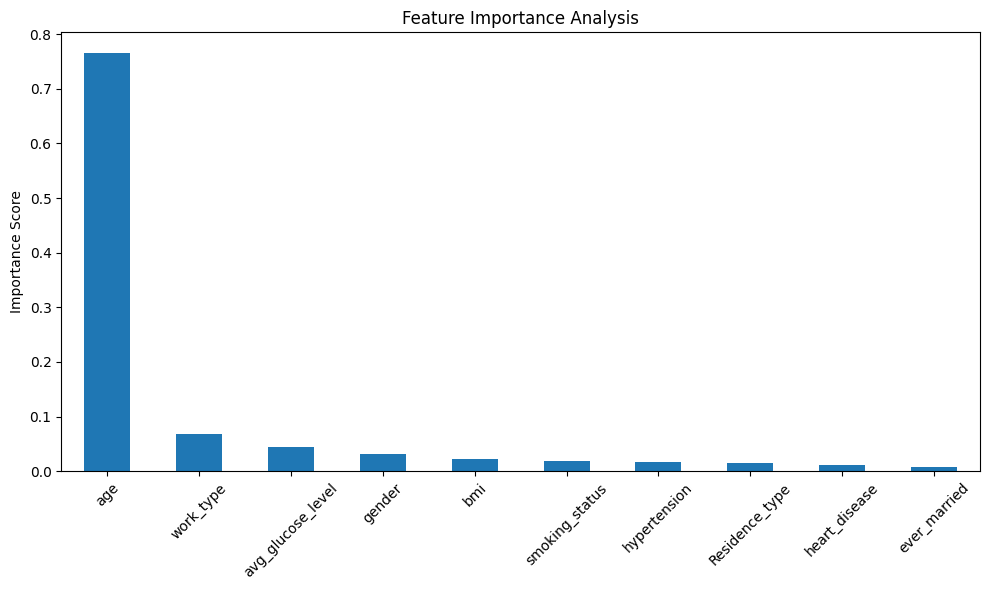

In [86]:
top_features = feat_imp.head(10).index.tolist()
print("Top selected features:", top_features)
plt.figure(figsize=(10, 6))
feat_imp.plot(kind='bar')
plt.title('Feature Importance Analysis')
plt.ylabel('Importance Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [87]:
top_features

['age',
 'work_type',
 'avg_glucose_level',
 'gender',
 'bmi',
 'smoking_status',
 'hypertension',
 'Residence_type',
 'heart_disease',
 'ever_married']

In [88]:
X_train_selected = X_train_over[top_features]
X_test_selected = X_test_over[top_features]


In [89]:
clf_gini_selected = DecisionTreeClassifier(criterion='gini', random_state=0, max_depth=5)
clf_gini_selected.fit(X_train_selected, y_train_over)

y_pred_selected = clf_gini_selected.predict(X_test_selected)

# Evaluate
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test_over, y_pred_selected))
print(classification_report(y_test_over, y_pred_selected))


[[718 257]
 [101 869]]
              precision    recall  f1-score   support

           0       0.88      0.74      0.80       975
           1       0.77      0.90      0.83       970

    accuracy                           0.82      1945
   macro avg       0.82      0.82      0.81      1945
weighted avg       0.82      0.82      0.81      1945



True 0 predicted as 0: 718

True 0 predicted as 1: 257 - FP

True 1 predicted as 1: 869

True 1 predicted as 0: 101 - FN

--
* Class 0 (no stroke)
Precision: 0.88
Recall: 0.74

* Class 1 (stroke):
Precision: 0.77
Recall: 0.90

Accuracy: 0.82

## PCA

In [90]:
from sklearn.decomposition import PCA

# How many components? Start with same number as your top features
pca = PCA(n_components=5)  # or 10, test and see!

# Fit PCA on your selected training data
X_train_pca = pca.fit_transform(X_train_over[top_features])
X_test_pca = pca.transform(X_test_over[top_features])

print("Explained variance ratio:", pca.explained_variance_ratio_)


Explained variance ratio: [8.64222367e-01 1.24173802e-01 1.09202313e-02 2.71295286e-04
 2.12142872e-04]


In [91]:
clf_gini_pca = DecisionTreeClassifier(criterion='gini', random_state=0, max_depth=5)
clf_gini_pca.fit(X_train_pca, y_train_over)

y_pred_pca = clf_gini_pca.predict(X_test_pca)

from sklearn.metrics import confusion_matrix, classification_report

print("=== PCA Version ===")
print(confusion_matrix(y_test_over, y_pred_pca))
print(classification_report(y_test_over, y_pred_pca))


=== PCA Version ===
[[731 244]
 [154 816]]
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       975
           1       0.77      0.84      0.80       970

    accuracy                           0.80      1945
   macro avg       0.80      0.80      0.79      1945
weighted avg       0.80      0.80      0.79      1945



Predictive Model

#### Logistic Regression

In [92]:
model = LogisticRegression()
model.fit(X_train_selected,y_train_over)
prediction3=model.predict(X_test_selected)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(y_test_over,prediction3))

The accuracy of the Logistic Regression is 0.8061696658097687


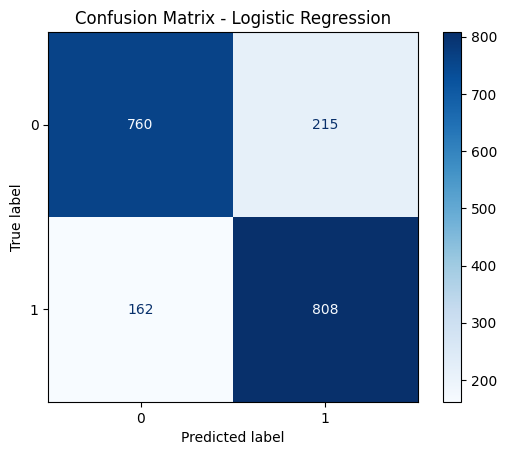

In [93]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create matrix
cm = confusion_matrix(y_test_over, prediction3)

# Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


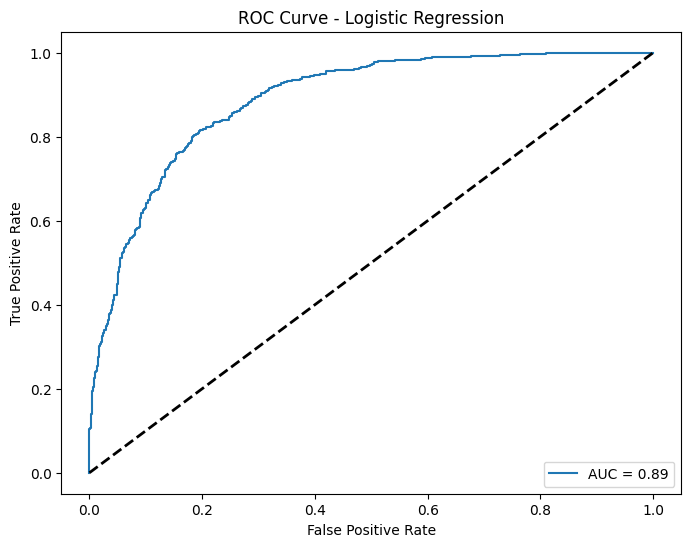

In [94]:
from sklearn.metrics import RocCurveDisplay, roc_curve, auc

# Get prediction probabilities for class 1
y_proba = model.predict_proba(X_test_selected)[:, 1]

# Compute ROC
fpr, tpr, thresholds = roc_curve(y_test_over, y_proba)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()


#### Decision Tree

In [95]:
model=DecisionTreeClassifier()
model.fit(X_train_selected,y_train_over)
prediction4=model.predict(X_test_selected)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(y_test_over,prediction4))

The accuracy of the Decision Tree is 0.910025706940874


In [128]:

model = RandomForestClassifier(n_estimators=20,max_depth=2)
model.fit(X_train_selected, y_train_over)
prediction7 = model.predict(X_test_selected)

print('The accuracy of the Random Forests is', metrics.accuracy_score(y_test_over, prediction7))


The accuracy of the Random Forests is 0.7753213367609254


In [133]:

model = RandomForestClassifier(n_estimators=500,max_depth=None)
model.fit(X_train_selected, y_train_over)
prediction7 = model.predict(X_test_selected)

print('The accuracy of the Random Forests is', metrics.accuracy_score(y_test_over, prediction7))


The accuracy of the Random Forests is 0.9455012853470437


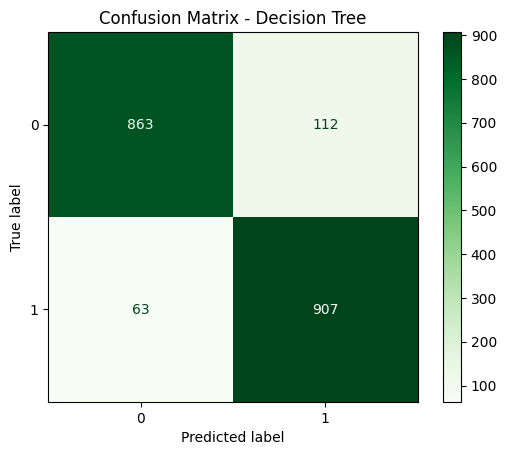

In [96]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_over, prediction4)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Greens')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


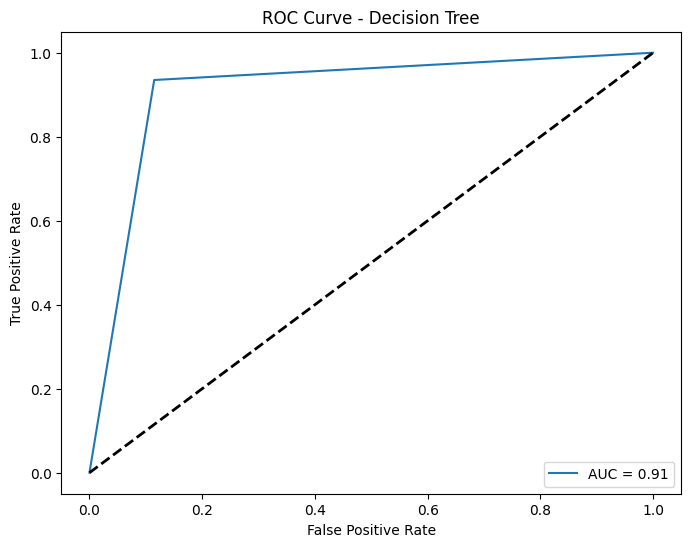

In [97]:
from sklearn.metrics import roc_curve, auc

y_proba = model.predict_proba(X_test_selected)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_over, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.show()


#### K neighbors

In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

model = KNeighborsClassifier()
model.fit(X_train_selected, y_train_over)
prediction5 = model.predict(X_test_selected)

print('The accuracy of the KNN is', metrics.accuracy_score(y_test_over, prediction5))


The accuracy of the KNN is 0.8894601542416453


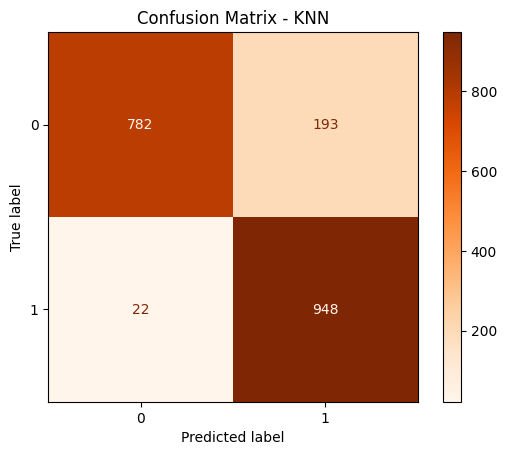

In [99]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_over, prediction5)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Oranges')
plt.title('Confusion Matrix - KNN')
plt.show()


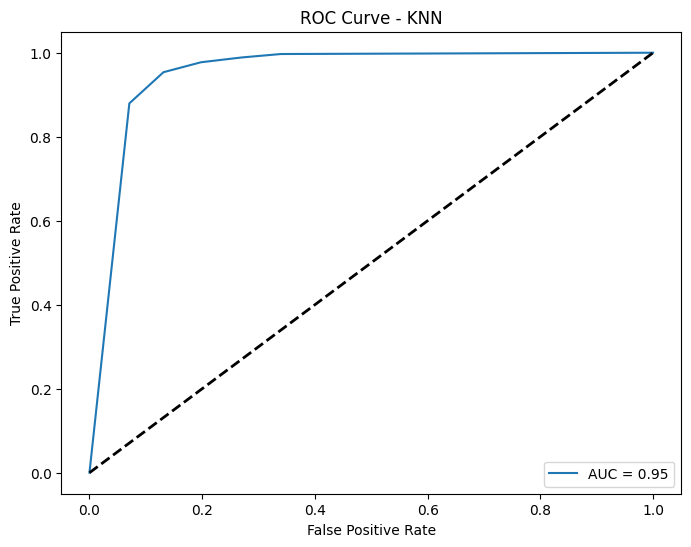

In [100]:
from sklearn.metrics import roc_curve, auc

# For KNN, predict_proba works too
y_proba = model.predict_proba(X_test_selected)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_over, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc='lower right')
plt.show()


#### Random Forest

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_selected, y_train_over)
prediction7 = model.predict(X_test_selected)

print('The accuracy of the Random Forests is', metrics.accuracy_score(y_test_over, prediction7))


The accuracy of the Random Forests is 0.9455012853470437


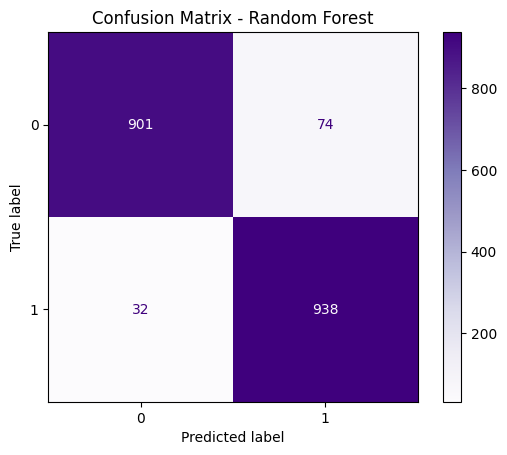

In [102]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_over, prediction7)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Purples')
plt.title('Confusion Matrix - Random Forest')
plt.show()


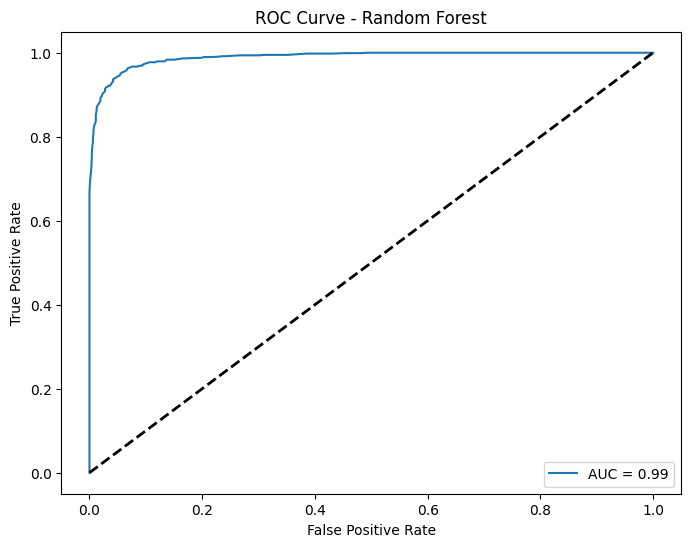

In [103]:
from sklearn.metrics import roc_curve, auc

y_proba = model.predict_proba(X_test_selected)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_over, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()


#### Ensembling:

Ensembling is a great method to increase the performance of a model. It is the combination of several simple models to create a single powerful model. 

We already got High accuracy for some models but it is just to explore different methods

#### Voting Classifier

In [104]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

log_clf = LogisticRegression()
dt_clf = DecisionTreeClassifier(max_depth=5)
rf_clf = RandomForestClassifier(n_estimators=100)
knn_clf = KNeighborsClassifier()

ensemble = VotingClassifier(
    estimators=[
        ('Logistic', log_clf),
        ('DecisionTree', dt_clf),
        ('RandomForest', rf_clf),
        ('KNN', knn_clf)
    ],
    voting='soft'
)

ensemble.fit(X_train_selected, y_train_over)

ensemble_pred = ensemble.predict(X_test_selected)

from sklearn import metrics
print('Ensemble Accuracy:', metrics.accuracy_score(y_test_over, ensemble_pred))


Ensemble Accuracy: 0.9038560411311054


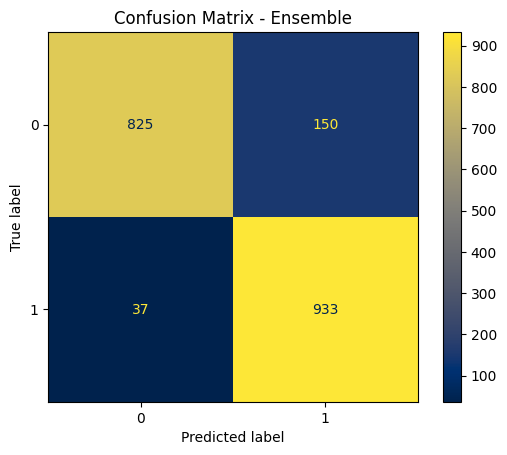

In [105]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_over, ensemble_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ensemble.classes_)
disp.plot(cmap='cividis')
plt.title('Confusion Matrix - Ensemble')
plt.show()


#### Boosting

In [106]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train_selected, y_train_over)

gb_pred = gb.predict(X_test_selected)

print('Gradient Boosting Accuracy:', accuracy_score(y_test_over, gb_pred))


Gradient Boosting Accuracy: 0.8622107969151671


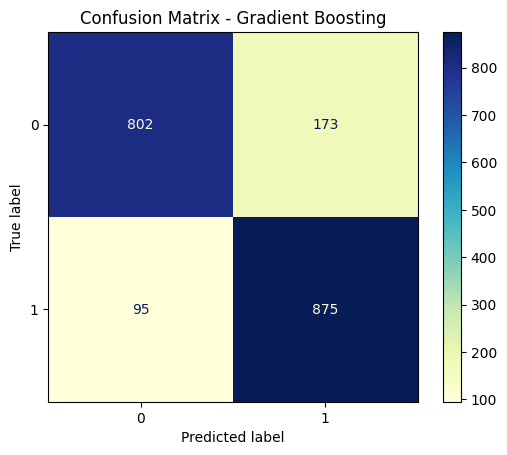

In [107]:
cm = confusion_matrix(y_test_over, gb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='YlGnBu')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

In [117]:
models = {
    "Logistic Regression": prediction3,
    "Decision Tree": prediction4,
    "KNN": prediction5,
    "Random Forest": prediction7,
    "Ensemble": ensemble_pred
}


results = []

for name, preds in models.items():
    acc = accuracy_score(y_test_over, preds) * 100
    cm = confusion_matrix(y_test_over, preds)
    tp = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tn = cm[1][1] 
    results.append([name, acc, tp,fp,fn,tn])

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy (%)', 'True Positive (TP)','False Positive (FP)','False Negatives (FN)','true Negatives (TN)'])
results_df.set_index('Model', inplace=True)
styled = results_df.style\
    .background_gradient(cmap='viridis')\
    .highlight_min(subset=['False Negatives (FN)'], color='red')\
    .format({'Accuracy (%)': "{:.1f}%"})\
    .set_table_styles([
        {'selector': 'thead th', 'props': [('background-color', '#333'), ('color', 'white')]},
        {'selector': 'tbody td', 'props': [('background-color', '#111'), ('color', 'white')]}
    ])

styled



,Accuracy (%),True Positive (TP),False Positive (FP),False Negatives (FN),true Negatives (TN)
Model,,,,,
Logistic Regression,80.6%,760,215,162,808
Decision Tree,91.0%,863,112,63,907
KNN,88.9%,782,193,22,948
Random Forest,94.6%,901,74,32,938
Ensemble,90.4%,825,150,37,933
